# ONA - Organizational Network Analysis

### A continuación evaluaremos una red, y analizaremos según distintos tipos de centralidad

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#inicialización
graph = nx.Graph()

In [3]:
#leer el archivo de datos a analizar
df_hr = pd.read_csv('df_people.csv',encoding='latin-1')

In [4]:
relaciones = [('Maxi','Maria'),('Pedro','Juana'),('Fermin','Juan'),('Fermin','Emma')
              ,('Fermin','Luis'),('Juan','Emma'),('Emma','Juan'),('German','Mario')
              ,('German','Seba'),('Mario','Seba'),('Jose','Adrian'),('Jose','Adriana')
              ,('Adrian','Adriana'),('Adrian','Esteban'),('Adriana','Esteban'),('Marcos','Maria')
              ,('Marcos','Pedro'),('Marcos','Fermin'),('Marcos','Jose'),('Maria','Fermin')
              ,('Maria','German'),('Maria','Jose'),('Maria','Adrian'),('Pedro','Fermin')
              ,('Pedro','Jose'),('Pedro','Marina'),('Pedro','Maxi'),('Fermin','Marina')
              ,('Fermin','Jose'),('Fermin','German'),('Fermin','Jorge'),('Jorge','Martin')
,('Jorge','Leandro'),('Jorge','Daniel'),('Daniel','Leandro')
,('Jorge','Celeste'),('Celeste','Lucas'),('Celeste','Rafael')]

In [5]:
#agrego conexiones
for node_a,node_b in relaciones:
    graph.add_edge(node_a,node_b)

In [6]:
df_hr.set_index('nombre').head(3)

,area,genero,rol,años_en_empresa
nombre,,,,
Maxi,Sistemas,Masculino,Empleado,1
Maria,Sistemas,Femenino,Coordinador,5
Pedro,Finanzas,Masculino,Coordinador,3


### Vamos armando la red, con sus nodos y enlaces

In [7]:
#recorro el dataframe y agrego todos los nodos y sus atributos
for index, row in df_hr.iterrows():
    graph.add_node(row['nombre'],area=row['area'],genero=row['genero'],rol=row['rol'])

In [8]:
generos=nx.get_node_attributes(graph,'genero')
roles=nx.get_node_attributes(graph,'rol')

In [9]:
#asigno color de acuerdo al genero y reemplazo en el dict
#Masculino Verde
#Femenino Naranja
for key, value in generos.items():
    generos[key] = 'green' if generos[key] == 'Masculino' else 'orange'

### Debajo calcularemos los valores de centralidad

In [10]:
#asigno tamaño de acuerdo al degree del nodo y reemplazo en el dict
#alto degree nodo grande
#bajo degree nodo pequeño
dg = nx.degree(graph)
degree_persons = [dg[node] * 1400 for node in graph.nodes()]

In [11]:
#vector de valor propio
eigenvector_centrality = nx.eigenvector_centrality(graph)
eigenvector_centrality_arr = np.asarray([eigenvector_centrality[n] for n in eigenvector_centrality])

In [12]:
#vector de intermediarios
betweenness_centrality = nx.betweenness_centrality(graph)
betweenness_centrality_arr = np.asarray([betweenness_centrality[n] for n in betweenness_centrality])

In [13]:
#vector de cercania
closeness_centrality = nx.closeness_centrality(graph)
closeness_centrality_arr = np.asarray([closeness_centrality[n] for n in closeness_centrality])

In [14]:
color_genero = [generos[node] for node in graph.nodes()]
shape_roles = [roles[node] for node in graph.nodes()]

## Comenzaremos a dibujar la red, de acuerdo al genéro y cantidad de enlaces

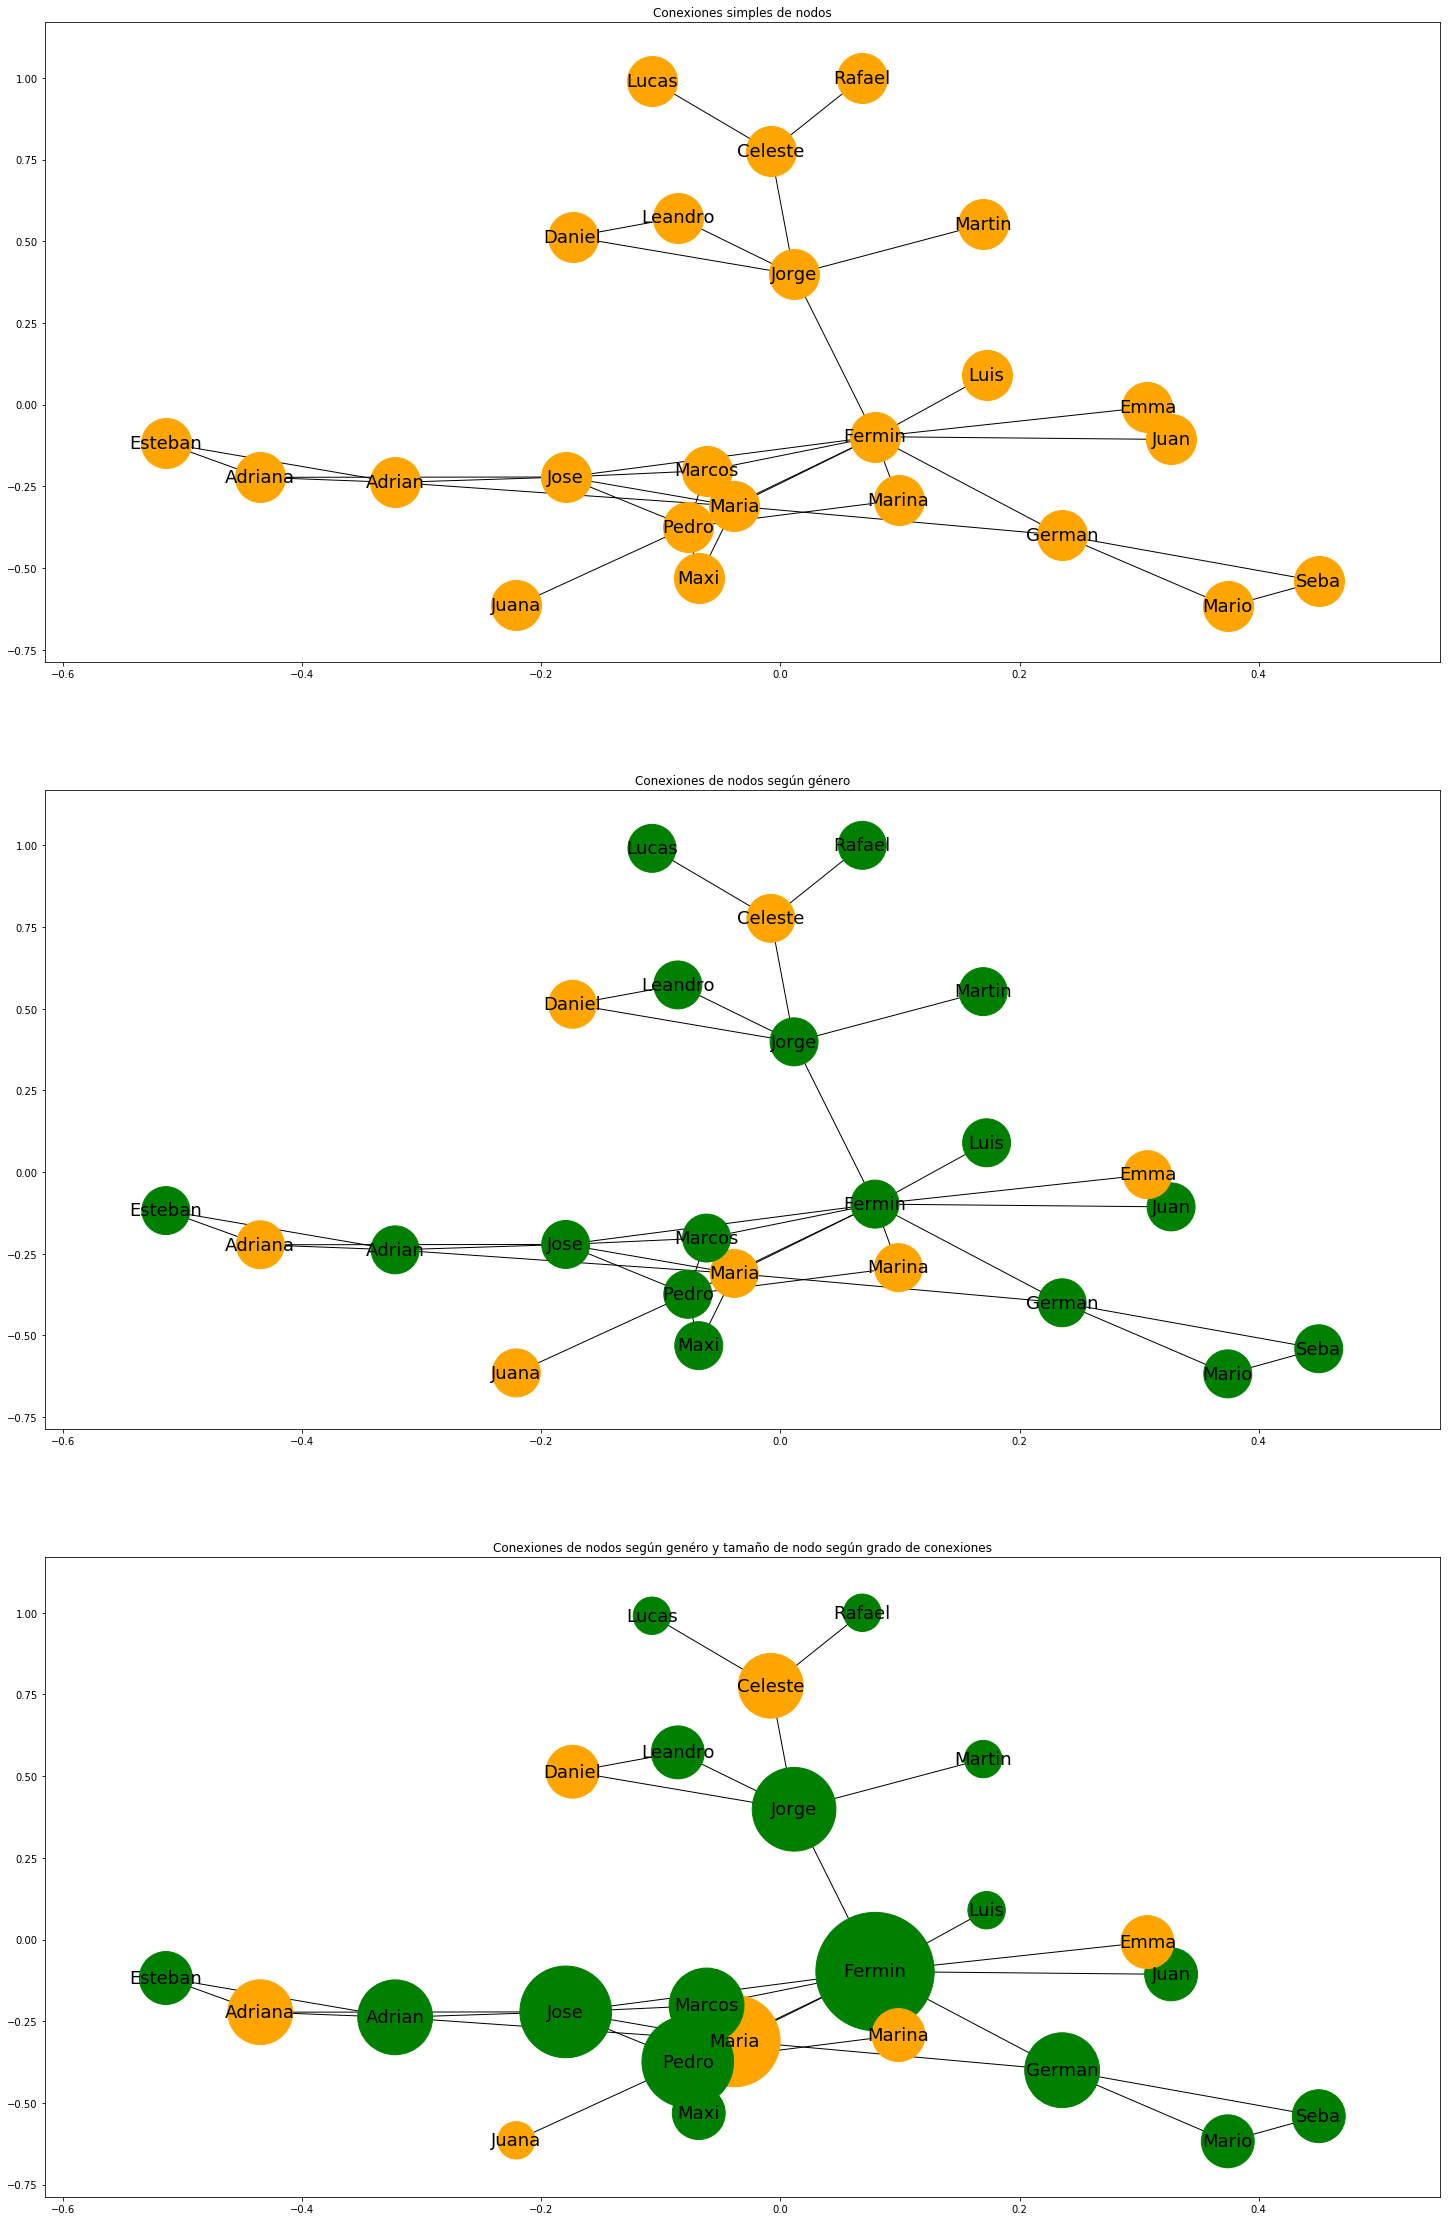

In [15]:
# AGREGO COLUMNAS DE GRAFICOS (sin color, y con color), PARA DIFERENCIARLOS, Y DEJO FIJO LOS NODOS.
#dejo fijo los nodos
pos = nx.layout.spring_layout(graph)

fig, ax = plt.subplots(3, 1, figsize=(25, 40))

first_plot = ax[0]
second_plot = ax[1]
third_plot = ax[2]

ax[0].set_title('Conexiones simples de nodos')
ax[1].set_title('Conexiones de nodos según género')
ax[2].set_title('Conexiones de nodos según genéro y tamaño de nodo según grado de conexiones')

nx.draw_networkx(graph, pos=pos, ax = first_plot , node_color= 'orange', node_size = 2500,font_color='k',font_size='18')
nx.draw_networkx(graph, pos=pos, ax = second_plot, node_color= color_genero, node_size = 2300,font_color='k',font_size='18')
nx.draw_networkx(graph, pos=pos, ax = third_plot, node_color= color_genero,node_size= degree_persons, node_shape='o',font_color='k',font_size='18')



# Analicemos la red por 4 tipos de centralidad

### 1) Grado
### 2) Intermediacion
### 3) Cercanía
### 4) de vector propio

-----------------------------------------------------------------


### 1) Centralidad de Grado

La centralidad de grado («degree centrality») es la primera y más simple de las medidas de centralidad. Indica el número de enlaces que posee un nodo con los demás.

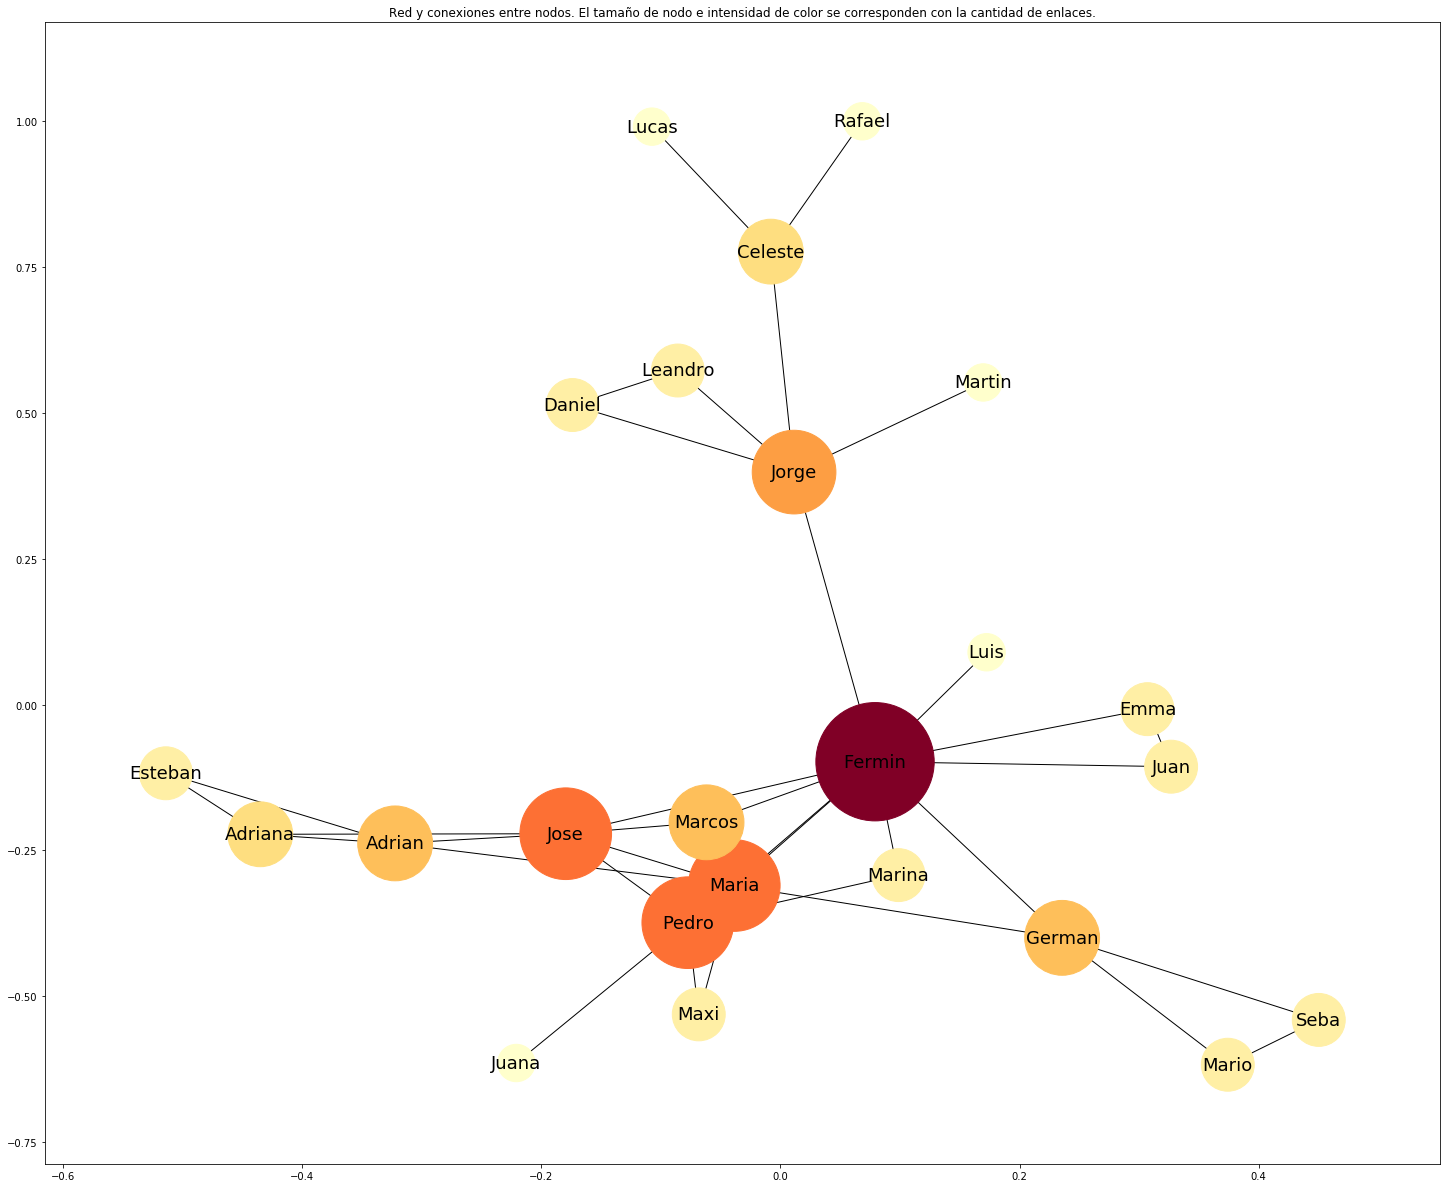

In [16]:
#dibujo el grafo por GRADO, o cantidad de enlaces
#pos = nx.layout.spring_layout(graph)
plt.figure(figsize=(25, 21))
plt.title('Red y conexiones entre nodos. El tamaño de nodo e intensidad de color se corresponden con la cantidad de enlaces.')

nx.draw_networkx(graph, pos=pos, node_color= degree_persons, cmap='YlOrRd' ,node_size= degree_persons, node_shape='o',font_color='k',font_size='18')

In [17]:
#ordeno la lista segun la cantidad de enlaces
sorted(graph.degree, key=lambda x: x[1], reverse=True)

[('Fermin', 10),
 ('Maria', 6),
 ('Pedro', 6),
 ('Jose', 6),
 ('Jorge', 5),
 ('German', 4),
 ('Adrian', 4),
 ('Marcos', 4),
 ('Adriana', 3),
 ('Celeste', 3),
 ('Maxi', 2),
 ('Juan', 2),
 ('Emma', 2),
 ('Mario', 2),
 ('Seba', 2),
 ('Esteban', 2),
 ('Marina', 2),
 ('Leandro', 2),
 ('Daniel', 2),
 ('Juana', 1),
 ('Luis', 1),
 ('Martin', 1),
 ('Lucas', 1),
 ('Rafael', 1)]

Vemos que Fermin, Maria, Pedro y Jose son los que mas enlacen tienen.

### 2) Intermediación

La intermediación («betweenness centrality») es una medida que cuantifica la frecuencia o el número de veces que un nodo actúa como un puente a lo largo del camino más corto entre otros dos nodos.
En otras palabras, cuantos mas nodos que necesiten pasar por mi para hacer sus conexiones indirectas por los caminos más cortos, más central seré yo.

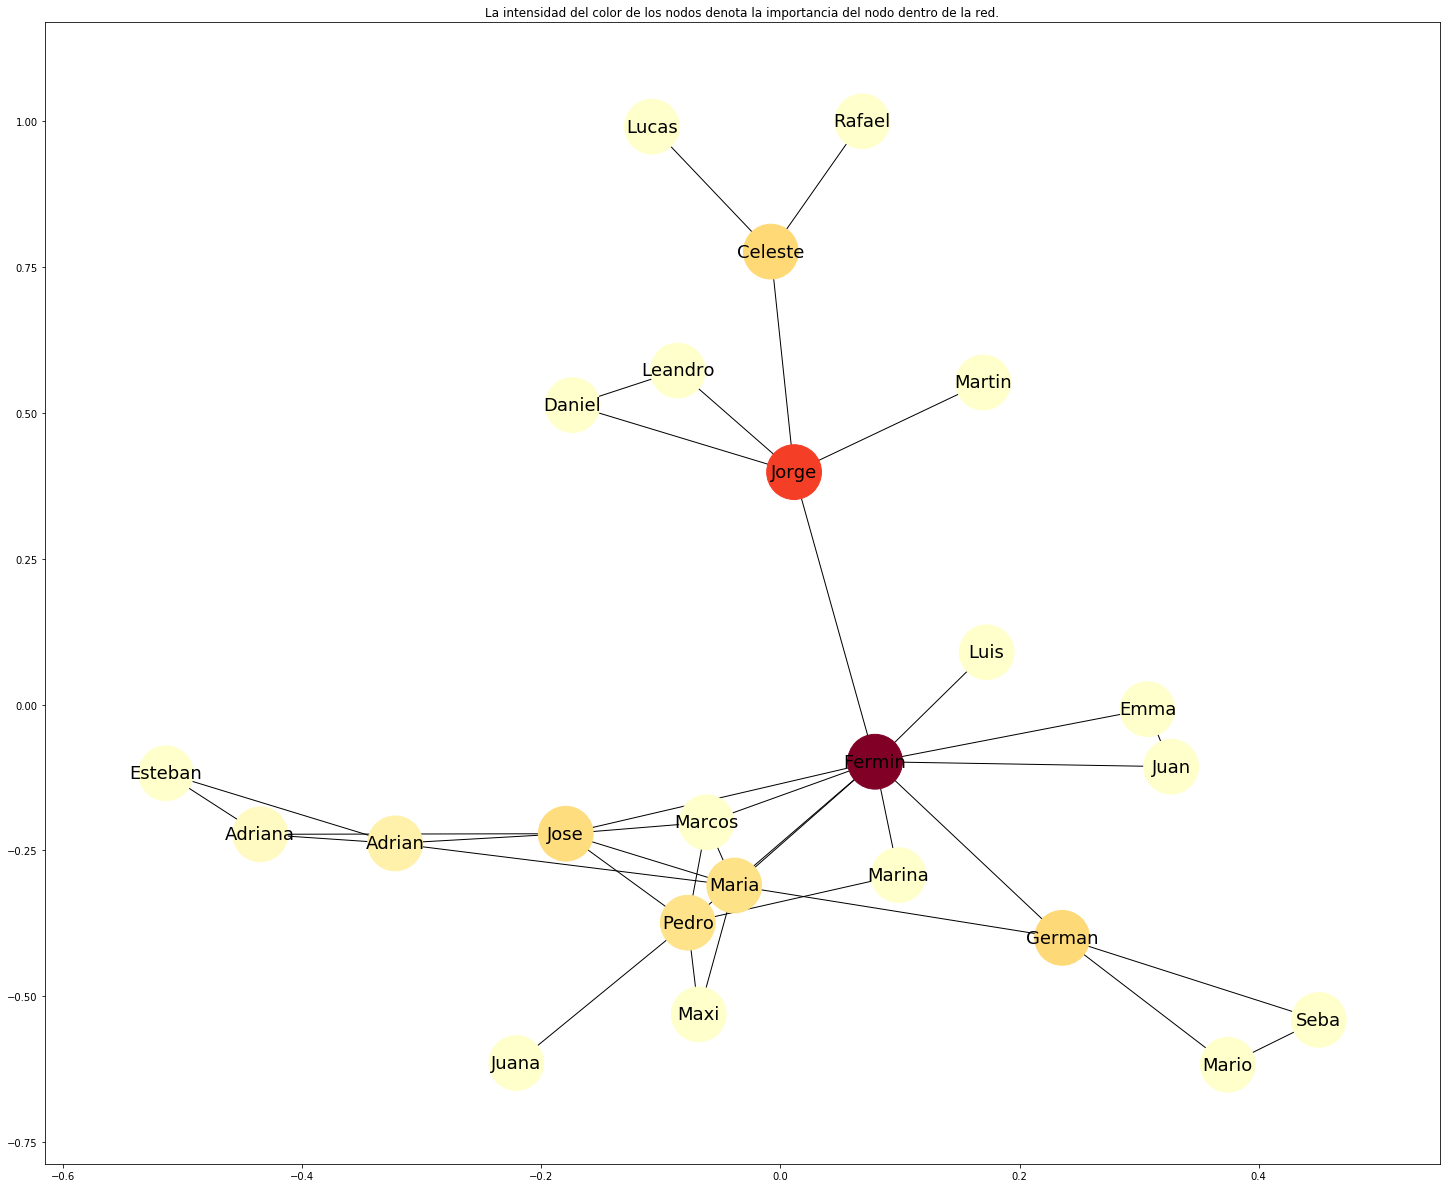

In [18]:
#pos = nx.layout.spring_layout(graph)
plt.figure(figsize=(25, 21))
plt.title('La intensidad del color de los nodos denota la importancia del nodo dentro de la red.')

nx.draw_networkx(graph, pos=pos, node_color= betweenness_centrality_arr , cmap='YlOrRd' , node_size = 3000, node_shape='o',font_color='k',font_size='18')

In [19]:
sorted(betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True)

[('Fermin', 0.6729907773386034),
 ('Jorge', 0.44664031620553357),
 ('Celeste', 0.16996047430830039),
 ('German', 0.1660079051383399),
 ('Jose', 0.15072463768115943),
 ('Maria', 0.13320158102766796),
 ('Pedro', 0.12674571805006585),
 ('Adrian', 0.06693017127799737),
 ('Adriana', 0.023320158102766806),
 ('Maxi', 0.001976284584980237),
 ('Marcos', 0.001976284584980237),
 ('Juana', 0.0),
 ('Juan', 0.0),
 ('Emma', 0.0),
 ('Luis', 0.0),
 ('Mario', 0.0),
 ('Seba', 0.0),
 ('Esteban', 0.0),
 ('Marina', 0.0),
 ('Martin', 0.0),
 ('Leandro', 0.0),
 ('Daniel', 0.0),
 ('Lucas', 0.0),
 ('Rafael', 0.0)]

Vemos que Fermin,Jorge, Celeste, Germán y Jose son las principales intermediarios.

### 3) Cercanía
La medida de cercanía, se basa en calcular la suma o bien el promedio de las distancias más cortas desde un nodo hacia todos los demás. La cercanía mide de alguna forma la accesibilidad de un nodo en la red, cuando mas cercano es el acceso a los demas nodos, mas alta su valoración


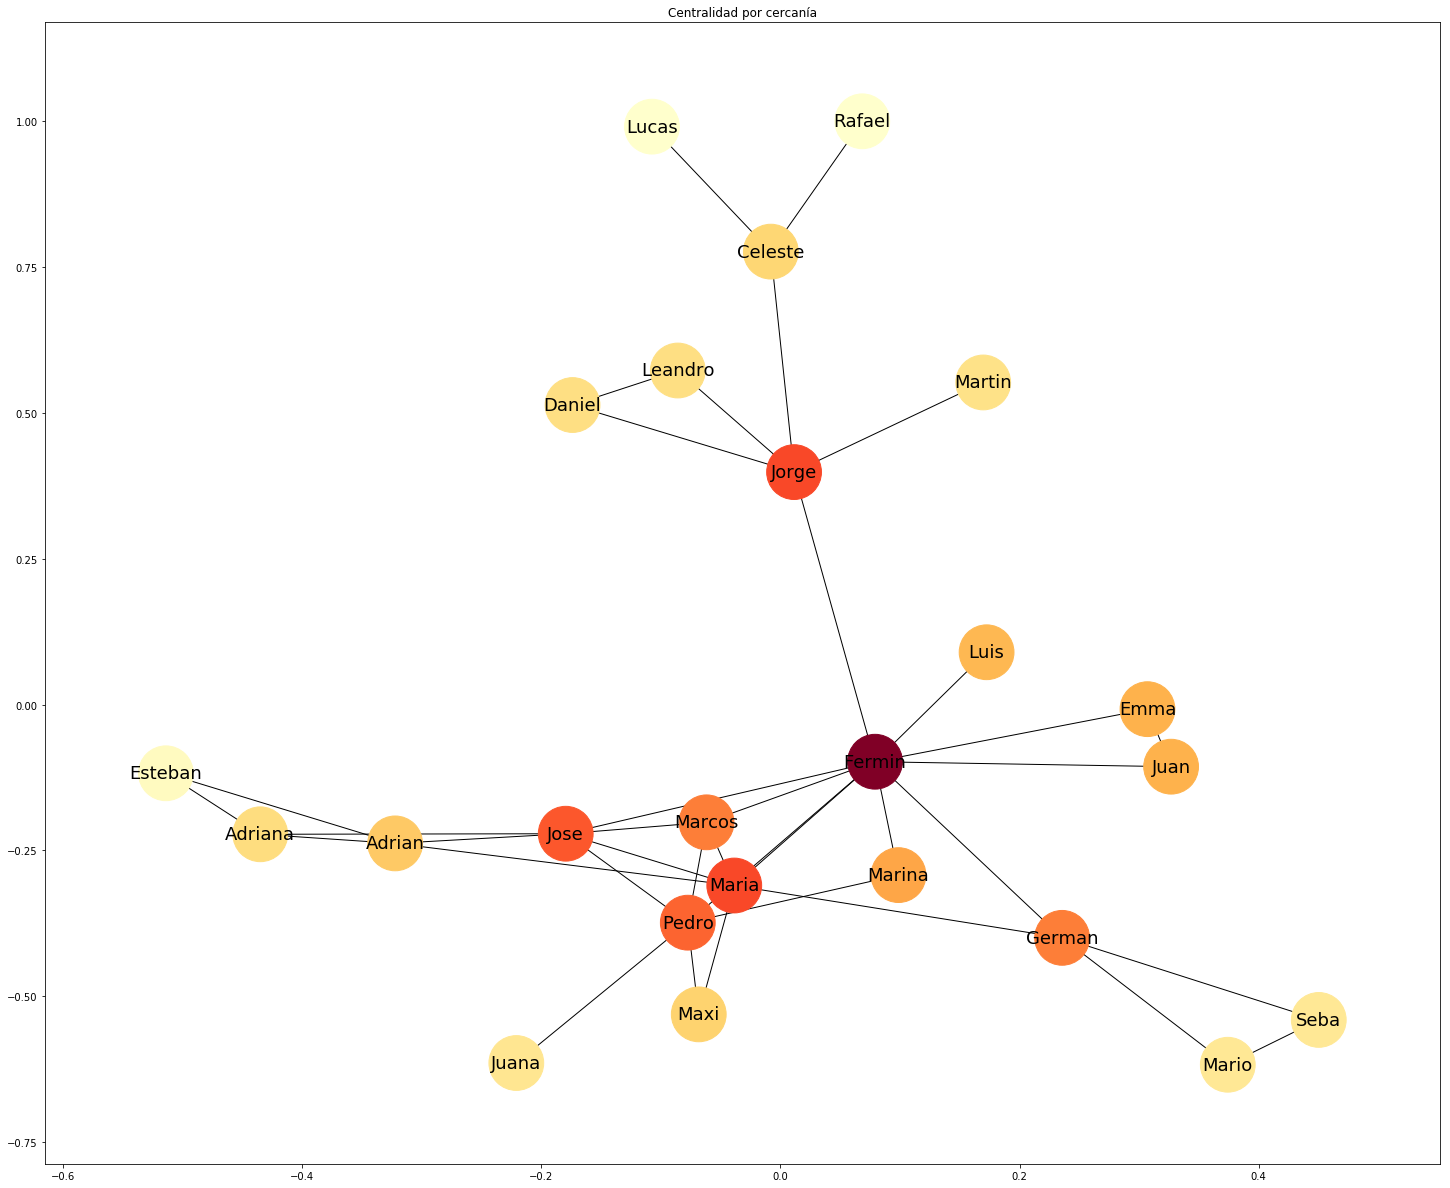

In [20]:
#pos = nx.layout.spring_layout(graph)
plt.figure(figsize=(25, 21))
plt.title('Centralidad por cercanía')

nx.draw_networkx(graph, pos = pos, node_color= closeness_centrality_arr, cmap='YlOrRd' , node_size = 3000, node_shape='o',font_color='k',font_size='18')

In [21]:
sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse=True)

[('Fermin', 0.5897435897435898),
 ('Maria', 0.46938775510204084),
 ('Jorge', 0.46938775510204084),
 ('Jose', 0.46),
 ('Pedro', 0.45098039215686275),
 ('German', 0.4339622641509434),
 ('Marcos', 0.4339622641509434),
 ('Marina', 0.39655172413793105),
 ('Juan', 0.38333333333333336),
 ('Emma', 0.38333333333333336),
 ('Luis', 0.3770491803278688),
 ('Adrian', 0.359375),
 ('Maxi', 0.3484848484848485),
 ('Celeste', 0.34328358208955223),
 ('Adriana', 0.3333333333333333),
 ('Leandro', 0.32857142857142857),
 ('Daniel', 0.32857142857142857),
 ('Martin', 0.323943661971831),
 ('Juana', 0.3150684931506849),
 ('Mario', 0.3108108108108108),
 ('Seba', 0.3108108108108108),
 ('Esteban', 0.27058823529411763),
 ('Lucas', 0.25842696629213485),
 ('Rafael', 0.25842696629213485)]

Vemos que Fermin, Maria, Jorge, Jose y Pedro son los mas valiosos en centralidad por cercanía.

### 3) De vector propio
La centralidad de vector propio mide la influencia de un nodo en una red. Corresponde al principal vector propio de la matriz de adyacencia del grafo analizado.
Intuitivamente, los nodos que poseen un valor alto de esta medida de centralidad están conectados a muchos nodos que a su vez están bien conectados, también en este sentido; por lo tanto, son buenos candidatos para difundir información, divulgar rumores o enfermedades, etc.


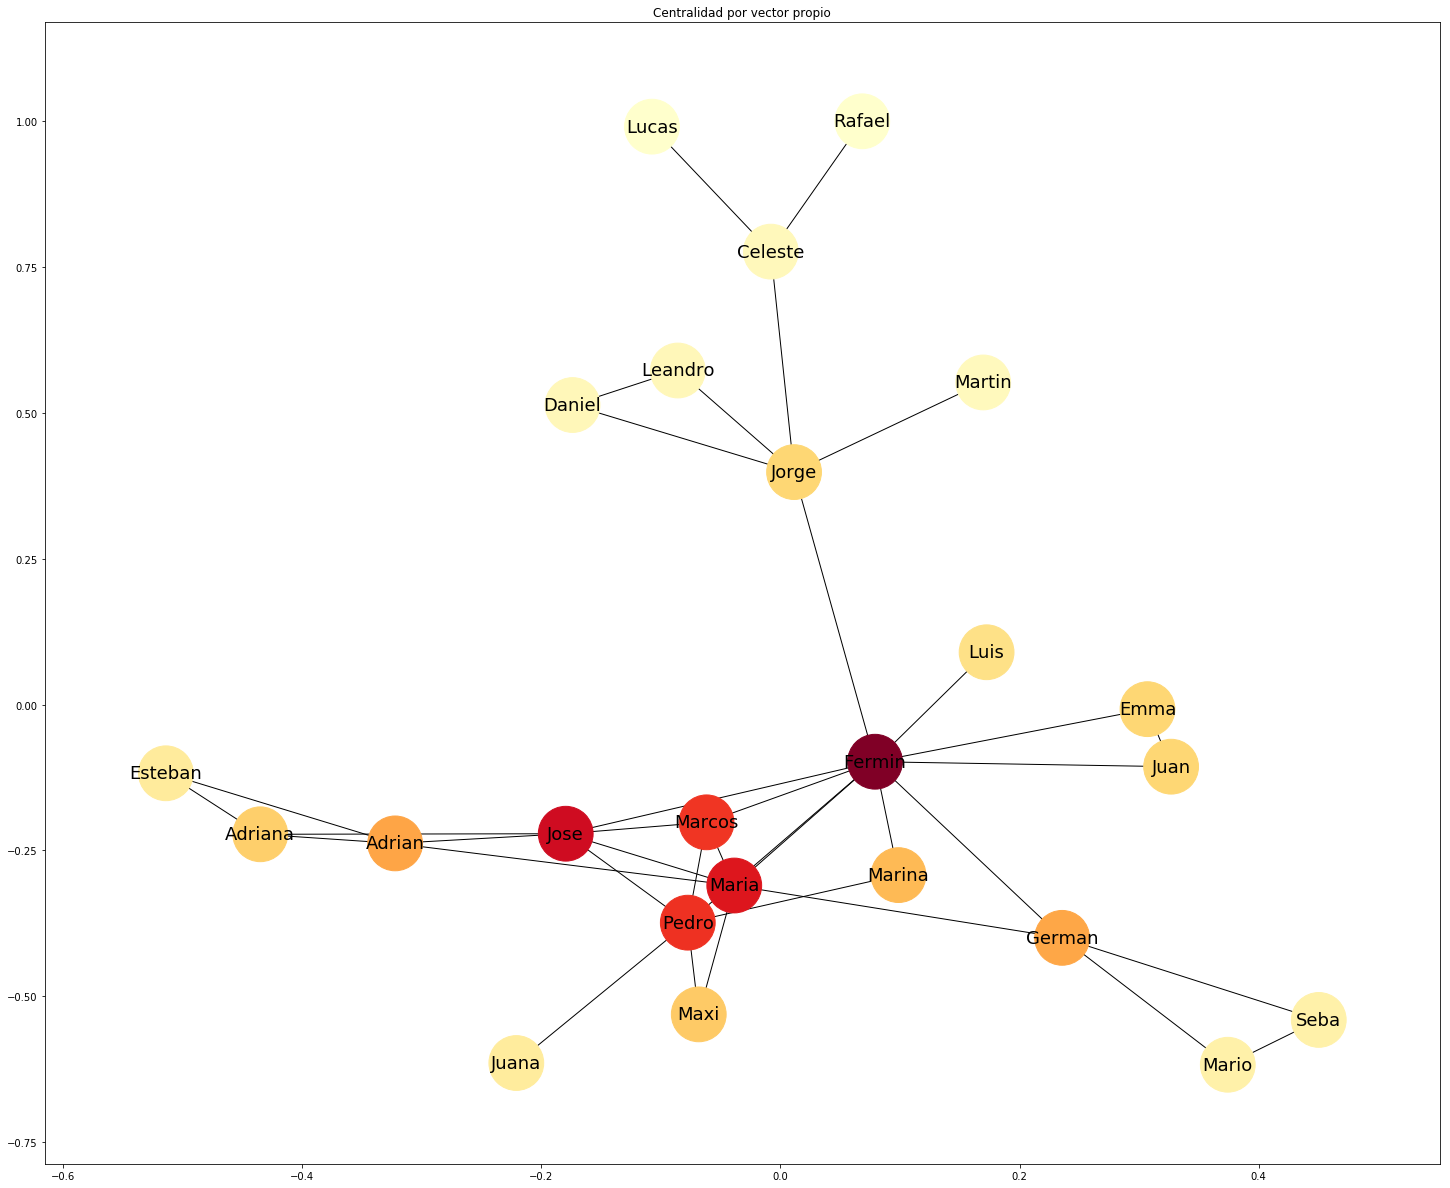

In [22]:
#pos = nx.layout.spring_layout(graph)
plt.figure(figsize=(25, 21))
plt.title('Centralidad por vector propio')

nx.draw_networkx(graph, pos=pos, node_color= eigenvector_centrality_arr, cmap='YlOrRd' , node_size = 3000, node_shape='o',font_color='k',font_size='18')

In [23]:
sorted(eigenvector_centrality.items(), key=operator.itemgetter(1), reverse=True)

[('Fermin', 0.48633352858454576),
 ('Jose', 0.3964625071788417),
 ('Maria', 0.3742367018911537),
 ('Pedro', 0.33926380902239006),
 ('Marcos', 0.3356610261088976),
 ('Adrian', 0.2074884328852785),
 ('German', 0.20377481889675833),
 ('Marina', 0.17360274851669794),
 ('Maxi', 0.1500310896864657),
 ('Adriana', 0.14246810134058768),
 ('Juan', 0.1294935224313739),
 ('Emma', 0.1294935224313739),
 ('Jorge', 0.12858865833797184),
 ('Luis', 0.10226408848681168),
 ('Esteban', 0.07358629293649561),
 ('Juana', 0.07133866002988626),
 ('Mario', 0.054257984759665694),
 ('Seba', 0.054257984759665694),
 ('Leandro', 0.03424004155638798),
 ('Daniel', 0.03424004155638798),
 ('Celeste', 0.029663408859739327),
 ('Martin', 0.027039739500482225),
 ('Lucas', 0.006237891774219555),
 ('Rafael', 0.006237891774219555)]

Vemos que Fermin, Jose, Maria, Pedro y Marcos son las personas con una alta influencia dentro de la red.